#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
X=torch.arange(12).reshape((4,3))
Y=torch.arange(12).reshape((4,3))

In [3]:
###행으로 병합 코드
torch.cat((X, Y), dim=0)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [4]:
###열로 병합 코드
torch.cat((X, Y), dim=1)

tensor([[ 0,  1,  2,  0,  1,  2],
        [ 3,  4,  5,  3,  4,  5],
        [ 6,  7,  8,  6,  7,  8],
        [ 9, 10, 11,  9, 10, 11]])

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [5]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [6]:
#설치해주기기
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [8]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [9]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([1.1424, 2.1178]) 
label: tensor([5.7436])


In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2115, -0.7869],
        [ 1.1870,  0.4310],
        [-0.6897, -0.2674],
        [-1.4309, -1.0310],
        [ 1.9114,  1.7226],
        [-0.7238,  1.3027],
        [ 1.6259, -0.9144],
        [ 0.1325, -0.3820],
        [ 1.5171, -1.4799],
        [-0.5305,  0.7971],
        [-0.9578, -0.5166],
        [ 0.0937, -1.1219],
        [-0.6108, -2.6702],
        [ 0.4357,  0.5848],
        [ 0.8724, -1.4343],
        [ 0.2557,  1.1118],
        [-0.8284,  0.6009],
        [ 1.7027, -0.1666],
        [ 0.7377, -1.2553],
        [ 1.7775, -0.0711]]) 
 tensor([[ 6.0504],
        [ 8.4110],
        [ 3.8353],
        [ 2.7440],
        [ 8.6592],
        [ 1.3690],
        [11.7368],
        [ 6.4576],
        [12.2686],
        [ 2.7190],
        [ 3.4089],
        [ 7.4700],
        [ 7.6655],
        [ 5.9285],
        [10.2548],
        [ 4.6166],
        [ 2.1106],
        [10.8606],
        [ 9.5688],
        [10.9508]])


In [12]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([2]) #원하는 실수를 넣어주세요

In [13]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드 완성하기

In [14]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 ###loss function 직접 짜보기

In [15]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      ###반복문으로 채워넣기
       for param in params:
           param -= lr * param.grad / batch_size 
           return param.grad.zero_()
          

In [16]:
lr = 0.01 ###직접 설정
num_epochs = 7 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

w0 = []
w1 = []
loss0 = []
loss1 = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y) ###채워넣기
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) ###채워넣기
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        #cost plot
        w0.append(w.tolist()[0])
        w1.append(w.tolist()[1])
        loss0.append(train_l[0].mean())
        loss1.append(train_l[1].mean())


epoch 1, loss 6.930607
epoch 2, loss 6.222447
epoch 3, loss 6.127384
epoch 4, loss 6.111534
epoch 5, loss 6.110471
epoch 6, loss 6.110646
epoch 7, loss 6.110472


In [18]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.1625, -0.0867], grad_fn=<SubBackward0>)
error in estimating b: tensor([3.5000])


+cost graph 그리기 (x축 w, y축 loss)

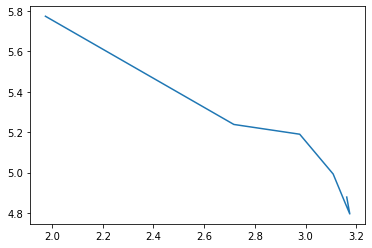

In [22]:
import matplotlib.pyplot as plt

plt.plot(w0, loss0)

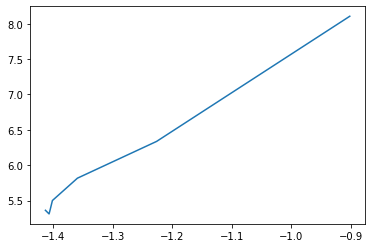

In [23]:
plt.plot(w1, loss1)

concise implementation of linear regression 
- api 사용해보기

In [24]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [25]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [26]:
next(iter(data_iter))

[tensor([[ 0.6785, -1.1468],
         [ 1.1798,  0.1311],
         [ 0.0639, -0.0475],
         [ 0.3041,  0.1086],
         [ 0.2037, -0.7557],
         [ 1.3978, -0.1747],
         [-0.1999,  0.7533],
         [-1.1648, -0.5628],
         [ 1.6958,  0.2640],
         [-0.1980, -0.2439],
         [ 1.0563,  0.5238],
         [-1.4512, -0.3055],
         [-1.3735, -0.5994],
         [-1.1243,  0.2513],
         [ 0.4082,  2.6932],
         [-0.9240,  0.7907],
         [-0.7981,  0.1112],
         [ 0.0097, -1.1257],
         [ 0.3021,  0.6674],
         [ 0.7663, -0.5591]]), tensor([[ 9.2604],
         [ 8.8412],
         [ 5.7756],
         [ 6.2470],
         [ 7.2655],
         [ 9.9441],
         [ 3.7736],
         [ 2.8476],
         [10.2057],
         [ 5.2755],
         [ 7.8793],
         [ 1.6182],
         [ 2.2895],
         [ 1.7554],
         [ 2.6754],
         [ 1.5542],
         [ 2.9297],
         [ 7.2239],
         [ 5.4065],
         [ 8.6338]])]

In [27]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) ###채워넣기

In [28]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [29]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [30]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) ###api function으로 직접 설정

In [31]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) ###직접설정
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000249
epoch 2, loss 0.000110
epoch 3, loss 0.000110


In [32]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 4.2200e-05, -6.0797e-04])
error in estimating b: tensor([2.7657e-05])
